<a href="https://colab.research.google.com/github/jeremymolina/ulead-2023-lll-BCD3103/blob/main/Proyecto_final_algebra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Downloading chest-xray-pneumonia.zip to ./chest-xray-pneumonia


100%|██████████| 2.29G/2.29G [00:23<00:00, 104MB/s]



Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Epoch 1/5
41/41 [==============================] - 725s 17s/step - loss: 1.9429 - accuracy: 0.7391 - val_loss: 0.7351 - val_accuracy: 0.6875
Epoch 2/5
41/41 [==============================] - 724s 17s/step - loss: 0.2699 - accuracy: 0.8877 - val_loss: 1.2626 - val_accuracy: 0.6250
Epoch 3/5
41/41 [==============================] - 733s 18s/step - loss: 0.2103 - accuracy: 0.9145 - val_loss: 1.8610 - val_accuracy: 0.7500
Epoch 4/5
41/41 [==============================] - 716s 17s/step - loss: 0.1820 - accuracy: 0.9296 - val_loss: 1.8251 - val_accuracy: 0.6875
Epoch 5/5
1/1 [==============================] - 1s 593ms/step


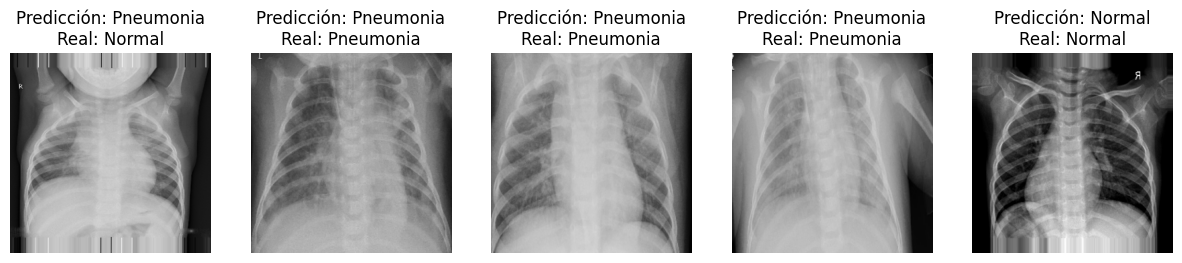

In [ ]:
!pip install opendatasets

import opendatasets as od
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Descargar el conjunto de datos desde Kaggle
od.download("https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia")

# Configurar el generador de datos de entrenamiento
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.2)

# Directorios de entrenamiento y validación
train_images = "chest-xray-pneumonia/chest_xray/train"
train_generator = train_datagen.flow_from_directory(
    train_images,
    target_size=(224, 224),
    batch_size=128,
    class_mode='binary'
)

val_images = "chest-xray-pneumonia/chest_xray/val"
val_generator = train_datagen.flow_from_directory(
    val_images,
    target_size=(224, 224),
    batch_size=128,
    class_mode='binary'
)

# Definir el modelo de CNN
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(300, 300, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Añadir capas densas para la clasificación
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(train_generator, epochs=5, validation_data=val_generator)

# Hacer predicciones en algunas imágenes del conjunto de prueba
test_images, test_labels = val_generator.next()
predictions = model.predict(test_images)

# Visualizar las imágenes y las predicciones
plt.figure(figsize=(15, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(test_images[i])

    predicted_class = "Pneumonia" if predictions[i] >= 0.5 else "Normal"
    true_class = "Pneumonia" if test_labels[i] == 1 else "Normal"

    plt.title(f'Predicción: {predicted_class}\nReal: {true_class}')
    plt.axis('off')

plt.show()

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sophiacespedes
Your Kaggle Key: ··········


100%|██████████| 2.29G/2.29G [00:27<00:00, 89.7MB/s]



Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
9406464/9406464 [==============================] - 0s 0us/step
Epoch 1/5
41/41 [==============================] - 359s 9s/step - loss: 0.3201 - accuracy: 0.8633 - val_loss: 0.4600 - val_accuracy: 0.7500
Epoch 2/5
41/41 [==============================] - 345s 8s/step - loss: 0.1587 - accuracy: 0.9375 - val_loss: 0.6048 - val_accuracy: 0.7500
Epoch 3/5
41/41 [==============================] - 350s 8s/step - loss: 0.1334 - accuracy: 0.9507 - val_loss: 0.1793 - val_accuracy: 0.8750
Epoch 4/5
41/41 [==============================] - 350s 8s/step - loss: 0.1264 - accuracy: 0.9513 - val_loss: 0.2824 - val_accuracy: 0.8750
Epoch 5/5
1/1 [==============================] - 2s 2s/step


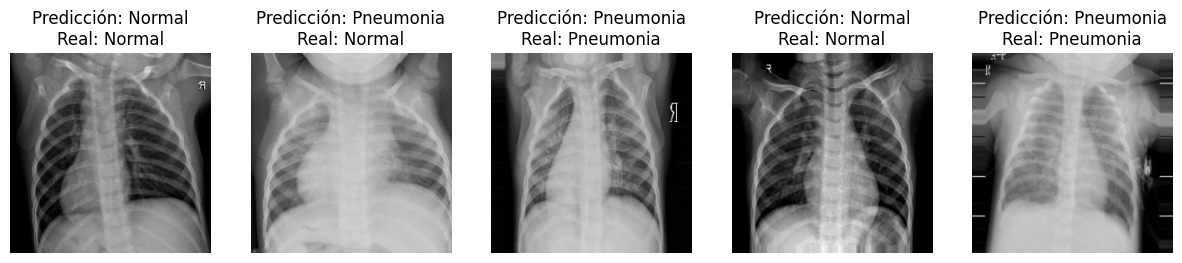

In [ ]:
!pip install opendatasets

import opendatasets as od
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Descargar el conjunto de datos desde Kaggle
od.download("https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia")

# Configurar el generador de datos de entrenamiento
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.2)

# Directorios de entrenamiento y validación
train_images = "chest-xray-pneumonia/chest_xray/train"
train_generator = train_datagen.flow_from_directory(
    train_images,
    target_size=(224, 224),
    batch_size=128,
    class_mode='binary'
)

val_images = "chest-xray-pneumonia/chest_xray/val"
val_generator = train_datagen.flow_from_directory(
    val_images,
    target_size=(224, 224),
    batch_size=128,
    class_mode='binary'
)

#Utilizar transfer learning, cargando el modelo preentrenado MobileNetV2
base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3),
                                               include_top=False,
                                               weights='imagenet')

base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(train_generator, epochs=5, validation_data=val_generator)

# Hacer predicciones en algunas imágenes del conjunto de prueba
test_images, test_labels = val_generator.next()
predictions = model.predict(test_images)

# Visualizar las imágenes y las predicciones
plt.figure(figsize=(15, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(test_images[i])

    predicted_class = "Pneumonia" if predictions[i] >= 0.5 else "Normal"
    true_class = "Pneumonia" if test_labels[i] == 1 else "Normal"

    plt.title(f'Predicción: {predicted_class}\nReal: {true_class}')
    plt.axis('off')

plt.show()

Interpretación de Resultados con Álgebra Lineal

Skipping, found downloaded files in "./chest-xray-pneumonia" (use force=True to force download)
Found 624 images belonging to 2 classes.
4/4 [==============================] - 2s 406ms/step


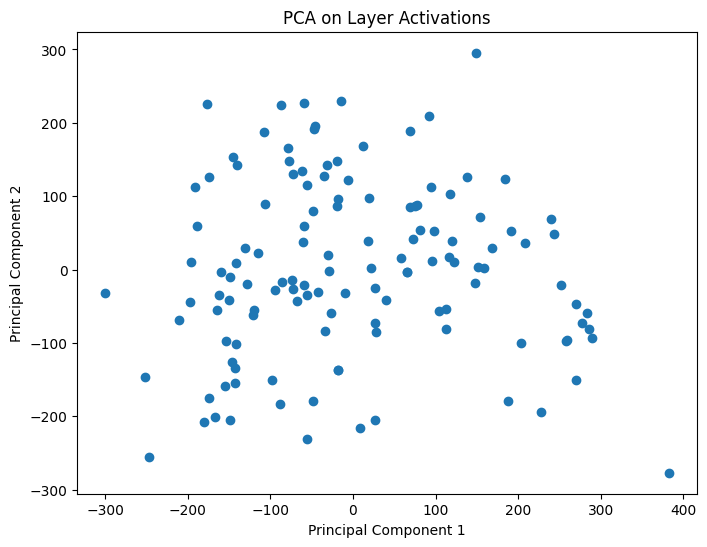

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from tensorflow.keras.models import Model

od.download("https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia")

# Configurar el generador de datos de entrenamiento
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.2)

# Cargar train data
model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False)

# Capa para el analisis
layer_name = 'block_1_expand'
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name).output)

# Función para obtener las activaciones de la capa
def get_activations(model, inputs):
    return intermediate_layer_model.predict(inputs)

# Generador de datos de prueba sin reescalado
test_datagen = ImageDataGenerator(rescale=1./255)

# Directorio de imegenes de prueba
test_images_dir = "chest-xray-pneumonia/chest_xray/test"

#  Generador de datos de prueba
test_generator = test_datagen.flow_from_directory(
    test_images_dir,
    target_size=(224, 224),
    batch_size=128,  # Ajusta esto según tus necesidades
    class_mode='binary',
    shuffle=False  # Generalmente no se mezcla el conjunto de prueba
)

# test_images imagenes de prueba; test_labels etiquetas
test_images, test_labels = test_generator.next()

# Imagenes de prueba
activations = get_activations(intermediate_layer_model, test_images)

# Activaciones para PCA y SVD
activations_reshaped = activations.reshape(activations.shape[0], -1)

# PCA para reducir la dimensionalidad
pca = PCA(n_components=2)  # Numero de componentes
principal_components = pca.fit_transform(activations_reshaped)

# Visualización de los componentes principales
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Layer Activations')
plt.show()

# Opcional: SVD en las activaciones
U, S, Vt = np.linalg.svd(activations_reshaped, full_matrices=False)
# Aquí puedes analizar U, S, Vt para entender las características
